<img src="Logistic.png">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [2]:
df = pd.read_csv("logistic_regression_data.csv", header= 0, names=["x1","x2","t"])

In [3]:
df.insert(0,'b',1)

In [4]:
df

,b,x1,x2,t
0,1,2.032725,-1.108874,0.0
1,1,0.874624,-0.746390,0.0
2,1,-1.695795,-0.546513,1.0
3,1,1.592453,-0.772068,0.0
4,1,-0.678388,0.161669,1.0
...,...,...,...,...
94,1,-0.704386,-0.400092,1.0
95,1,0.640450,-1.544643,0.0
96,1,-0.826592,0.397815,1.0
97,1,-0.191372,0.388614,1.0


In [5]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [6]:
#def sigmoid_(z):
        #return np.tanh(z * 0.5) * 0.5 + 0.5

In [7]:
#Inicializando Parâmetros
alfa = 1


X = df[['b','x1','x2']].to_numpy()
t = df[['t']].to_numpy().ravel()

#w = np.zeros((X.shape[1], 1))
w = np.zeros(np.size(X, 1))

identidade = np.eye(X.shape[1])
#identidade = np.eye(np.size(X, 1))

w_med = np.copy(w)
precisao = alfa * identidade


In [8]:
#Atualizando Parâmetros
for i in range(100):
    w_anterior = np.copy(w)
    y = sigmoid(X @ w).ravel()
    gradiente = X.T @ (y - t) + precisao @ (w - w_med)
    hessiana = (X.T * y * (1-y)) @ X + precisao
    try:
        w -= np.linalg.solve(hessiana, gradiente)
    except np.linalg.LinAlgError:
        break
    if np.allclose(w, w_anterior):
        break
w_med = w
precisao = hessiana

    

In [9]:
#Predição
media_a = X @ w_med
variancia_a = np.sum(np.linalg.solve(precisao, X.T).T * X, axis=1)
probabilidades = sigmoid(media_a / np.sqrt(1 + np.pi * variancia_a / 8 ))

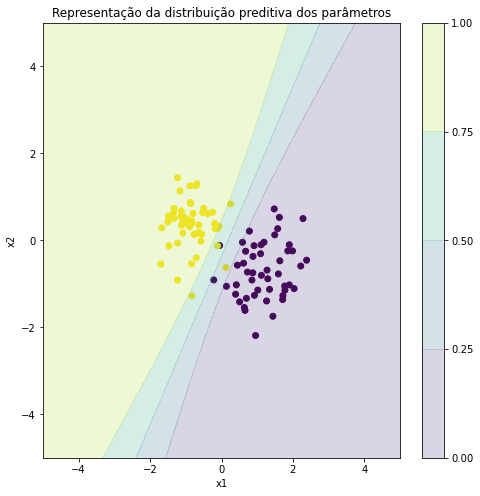

In [10]:
x1_test, x2_test = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T
X_test = np.c_[ np.ones(10000), x_test ]
w_med = w
precisao = hessiana
media_a = X_test @ w_med
variancia_a = np.sum(np.linalg.solve(precisao, X_test.T).T * X_test, axis=1)
y_test = sigmoid(media_a / np.sqrt(1 + np.pi * variancia_a / 8 ))

plt.figure(figsize=(8,8))
plt.scatter(X[:, 1], X[:, 2], c=t)
plt.contourf(x1_test, x2_test, y_test.reshape(100, 100), np.linspace(0, 1, 5), alpha=0.2)
plt.colorbar()
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.xlabel('x1')
plt.ylabel('x2')

plt.title('Representação da distribuição preditiva dos parâmetros')

plt.savefig('Logistic')

plt.show()


In [18]:
a = np.linspace(0, 1, 5)
a

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [16]:
y_test.shape

(10000,)

In [14]:
x1_test.shape

(100, 100)

In [13]:
x2_test.shape

(100, 100)